In [1]:
# Local imports
from Adaptive_GP.GP import GP

# third party imports
import numpy as np
import matplotlib.pyplot as plt
plt.style.use({'figure.facecolor':'white'})

import torch as th
import os
import pyro
import pyro.contrib.gp as gp
import pyro.distributions as dist
smoke_test = ('CI' in os.environ)
pyro.set_rng_seed(0)

from datetime import datetime

import matplotlib as mpl
from matplotlib import rc
mpl.rcParams['font.family'] = ['times new roman'] # default is sans-serif
rc('text', usetex=True)
mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
datetime = datetime.now().strftime("%Y_%m_%d-%I_%M_%S_%p")
%load_ext autoreload
%autoreload 2

In [2]:
# Function for which surrogate is needed
def f(x):
    """
    Fn with both local and global minimum. Forrester et al. (2008)
    Parameters
    ----------
    x :

    Returns
    -------

    """
    y = (6 * x - 2)**2 * np.sin(12 * x - 4)
    return y.flatten()

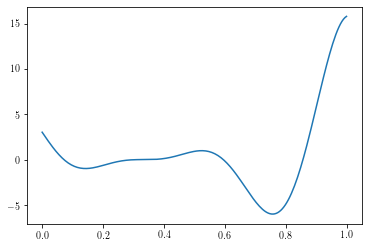

In [3]:
x = np.linspace(0,1,200)
plt.plot(x, f(x))

In [5]:
# Initialisation
metamodel = GP(input_dim=1,function=f)

## Surrogating with GP without adaptive step

In [12]:
# Training
x_train = np.reshape(np.linspace(0,1,30) ,(-1,1))
loss = metamodel.fit(x_train)

In [13]:
# Prediction
x_pred = np.reshape(np.linspace(0,1,200) ,(-1,1))
mean, cov = metamodel.predict(x_pred)

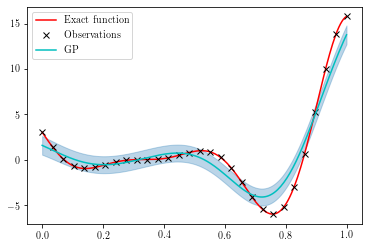

In [14]:
metamodel.predict_plot(mean,cov,x_pred,x_pred)

## Adaptive GP

In [18]:
x_i = np.expand_dims(np.array([0.0, 0.33, 0.66, 1.0]),axis=1)
loss = metamodel.adapt_fit(x_init = x_i,num_steps=10,kappa=3)

The acquisition function selected is y(x) = argmin_x \mu(x) - k* \sigma(x)  


In [19]:
# Prediction
x_pred = np.reshape(np.linspace(0,1,200) ,(-1,1))
mean, cov = metamodel.predict(x_pred)

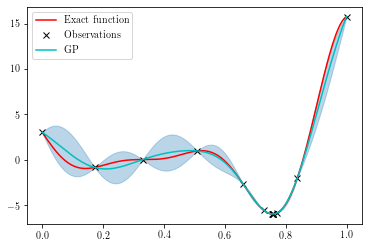

In [20]:
metamodel.predict_plot(mean,cov,x_pred,x_pred)

In [10]:
metamodel.gpr.X

tensor([[0.0000],
        [0.3300],
        [0.6600],
        [1.0000],
        [0.5248],
        [0.6564],
        [0.7257],
        [0.7909],
        [0.1799],
        [0.7586],
        [0.7572],
        [0.7569],
        [0.7568],
        [0.7566]], dtype=torch.float64)

# Testing for Sine function

In [21]:
def f_2(x):
    return np.sin(np.pi*8*x).flatten()

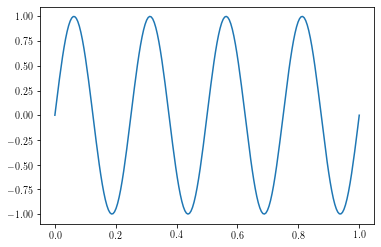

In [22]:
x = np.linspace(0,1,200)
plt.plot(x, f_2(x))

In [23]:
# Initialisation
metamodel = GP(input_dim=1,function=f_2)

## Surrogating with GP without adaptive step

In [30]:
# Training
x_train = np.reshape(np.linspace(0,1,15) ,(-1,1))
loss = metamodel.fit(x_train)

In [31]:
# Prediction
x_pred = np.reshape(np.linspace(0,1,200) ,(-1,1))
mean, cov = metamodel.predict(x_pred)

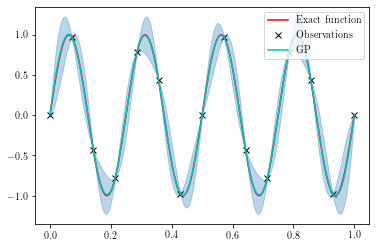

In [32]:
metamodel.predict_plot(mean,cov,x_pred,x_pred)

## Adaptive GP

In [36]:
x_i = np.expand_dims(np.array([0.0, 0.33, 0.66, 1.0]),axis=1)
loss = metamodel.adapt_fit(x_init = x_i,num_steps=20,kappa=15)

The acquisition function selected is y(x) = argmin_x \mu(x) - k* \sigma(x)  


In [37]:
# Prediction
x_pred = np.reshape(np.linspace(0,1,200) ,(-1,1))
mean, cov = metamodel.predict(x_pred)

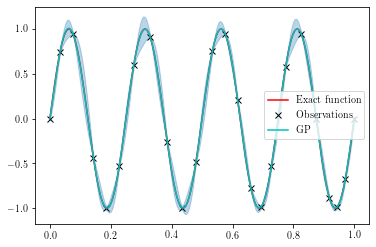

In [38]:
metamodel.predict_plot(mean,cov,x_pred,x_pred)